In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin = dataset_url , cache_dir = "." , untar = True)

228813984/228813984 [==============================] - 33s 0us/step


In [6]:
data_dir

'.\\datasets\\flower_photos'

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [26]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

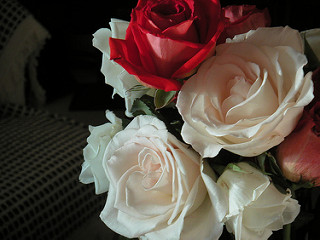

In [28]:
PIL.Image.open(str(roses[1]))

In [29]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [30]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [31]:
flowers_images_dict['roses'][:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [32]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [33]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [34]:
img.shape

(240, 179, 3)

In [35]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [36]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [38]:
X = np.array(X)
y = np.array(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [41]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)           

Epoch 1/30
86/86 [==============================] - 72s 659ms/step - loss: 1.3767 - accuracy: 0.4150
Epoch 2/30
86/86 [==============================] - 55s 642ms/step - loss: 1.0321 - accuracy: 0.5908
Epoch 3/30
86/86 [==============================] - 54s 627ms/step - loss: 0.8526 - accuracy: 0.6704
Epoch 4/30
86/86 [==============================] - 54s 631ms/step - loss: 0.6463 - accuracy: 0.7609
Epoch 5/30
86/86 [==============================] - 60s 693ms/step - loss: 0.4408 - accuracy: 0.8419
Epoch 6/30
86/86 [==============================] - 58s 676ms/step - loss: 0.2391 - accuracy: 0.9244
Epoch 7/30
86/86 [==============================] - 56s 652ms/step - loss: 0.1352 - accuracy: 0.9560
Epoch 8/30
86/86 [==============================] - 57s 669ms/step - loss: 0.0755 - accuracy: 0.9786
Epoch 9/30
86/86 [==============================] - 59s 681ms/step - loss: 0.0641 - accuracy: 0.9822
Epoch 10/30
86/86 [==============================] - 60s 697ms/step - loss: 0.0544 - accura

In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 184ms/step - loss: 2.4990 - accuracy: 0.6438


[2.498991012573242, 0.6437908411026001]

In [43]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 6s 178ms/step


array([[  5.0964227,  34.478725 ,  -1.7989725, -23.985683 , -11.966701 ],
       [  9.999147 ,   3.0938761,  -7.515281 ,  -5.972893 ,   6.214228 ],
       [  4.2892127,  -4.471353 ,  19.843685 , -20.041103 ,  -3.2963207],
       ...,
       [ -3.3204434,  -1.7122749,  -2.5002203,  12.878895 ,   8.44465  ],
       [  2.8698003,   4.0262365,  -4.484508 ,  -2.806397 ,   6.21409  ],
       [  2.6717637, -14.194855 ,   5.690665 ,  10.764584 ,   8.553021 ]],
      dtype=float32)

In [44]:
score = tf.nn.softmax(predictions[0])

In [45]:
np.argmax(score)

1

In [46]:
y_test[0]

1

In [57]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"), 
                                                 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


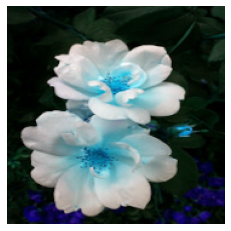

In [58]:
plt.axis('off')
plt.imshow(X[0])

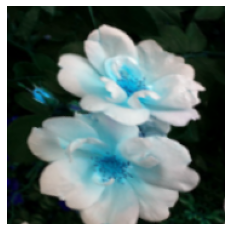

In [59]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [60]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 81s 850ms/step - loss: 1.3060 - accuracy: 0.4408
Epoch 2/30
86/86 [==============================] - 72s 837ms/step - loss: 1.0434 - accuracy: 0.5770
Epoch 3/30
86/86 [==============================] - 72s 837ms/step - loss: 0.9396 - accuracy: 0.6268
Epoch 4/30
86/86 [==============================] - 71s 827ms/step - loss: 0.8618 - accuracy: 0.6657
Epoch 5/30
86/86 [==============================] - 73s 851ms/step - loss: 0.8023 - accuracy: 0.6995
Epoch 6/30
86/86 [==============================] - 72s 833ms/step - loss: 0.7720 - accuracy: 0.7039
Epoch 7/30
86/86 [==============================] - 73s 850ms/step - loss: 0.7033 - accuracy: 0.7326
Epoch 8/30
86/86 [==============================] - 74s 856ms/step - loss: 0.6838 - accuracy: 0.7369
Epoch 9/30
86/86 [==============================] - 76s 878ms/step - loss: 0.6333 - accuracy: 0.7580
Epoch 10/30
86/86 [==============================] - 75s 874ms/step - loss: 0.6302 - accura

In [61]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 6s 154ms/step - loss: 0.8975 - accuracy: 0.7505


[0.8975089192390442, 0.7505446672439575]